In [1]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/us-accidents/US_Accidents_March23.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataFile="/kaggle/input/us-accidents/US_Accidents_March23.csv"

# Data Prepration and Cleaning

In [4]:
df= pd.read_csv(dataFile)
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df.info

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


<bound method DataFrame.info of                 ID   Source  Severity           Start_Time  \
0              A-1  Source2         3  2016-02-08 05:46:00   
1              A-2  Source2         2  2016-02-08 06:07:59   
2              A-3  Source2         2  2016-02-08 06:49:27   
3              A-4  Source2         3  2016-02-08 07:23:34   
4              A-5  Source2         2  2016-02-08 07:39:07   
...            ...      ...       ...                  ...   
7728389  A-7777757  Source1         2  2019-08-23 18:03:25   
7728390  A-7777758  Source1         2  2019-08-23 19:11:30   
7728391  A-7777759  Source1         2  2019-08-23 19:00:21   
7728392  A-7777760  Source1         2  2019-08-23 19:00:21   
7728393  A-7777761  Source1         2  2019-08-23 18:52:06   

                    End_Time  Start_Lat   Start_Lng   End_Lat    End_Lng  \
0        2016-02-08 11:00:00  39.865147  -84.058723       NaN        NaN   
1        2016-02-08 06:37:59  39.928059  -82.831184       NaN        Na

In [6]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
len(newdf.columns)

13

In [8]:
missing_percentage=df.isna().sum().sort_values(ascending=False)*100/len(df)
missing_percentage

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
Traffic_Signal            0.000000
Roundabout                0.000000
Station                   0.000000
Stop                      0.000000
Traffic_Calming           0.000000
Country                   0.000000
Turning_Loop        

<Axes: >

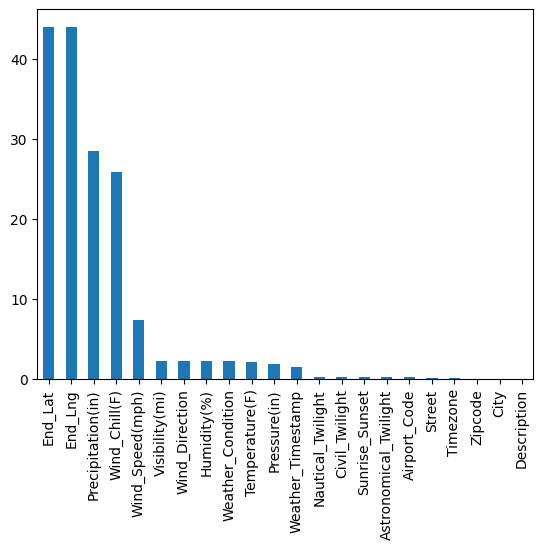

In [9]:
missing_percentage[missing_percentage !=0].plot(kind='bar')

# Exploaratory anylasis

In [10]:
cities=df.City.unique()
len(cities)

13679

In [11]:
cities_by_accidents=df.City.value_counts()
cities_by_accidents

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

In [12]:
cities_by_accidents[:20]

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

<Axes: xlabel='City'>

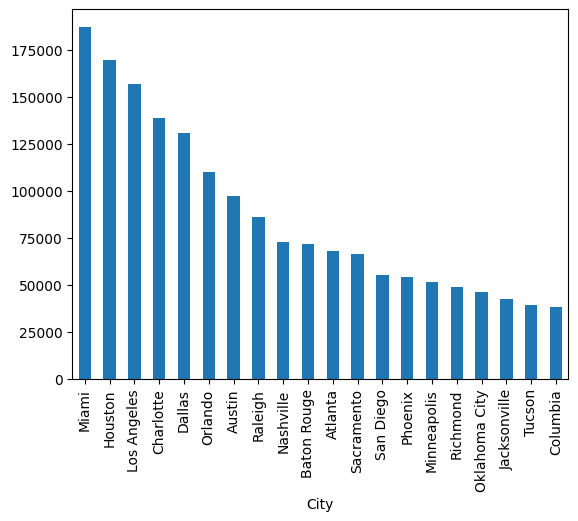

In [13]:
cities_by_accidents[:20].plot(kind="bar")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Count'>

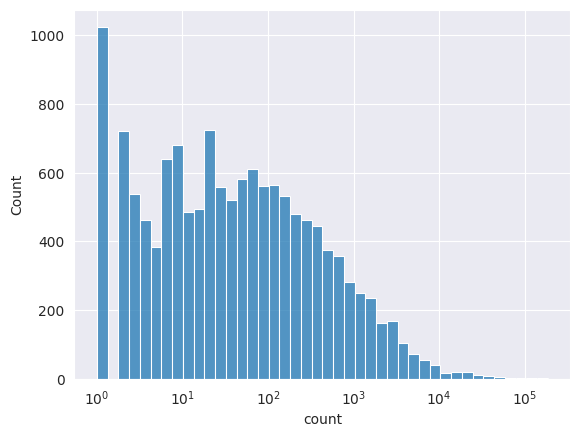

In [14]:

sns.set_style("darkgrid")
sns.histplot(cities_by_accidents,log_scale=True)

In [15]:
cities_by_accidents[cities_by_accidents==1]

City
Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: count, Length: 1023, dtype: int64

In [16]:
high_accident_cities=cities_by_accidents[cities_by_accidents>=1000]
low_accident_cities=cities_by_accidents[cities_by_accidents<1000]

In [17]:
(len(high_accident_cities)/len(cities))*100

8.904159660793917

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Count'>

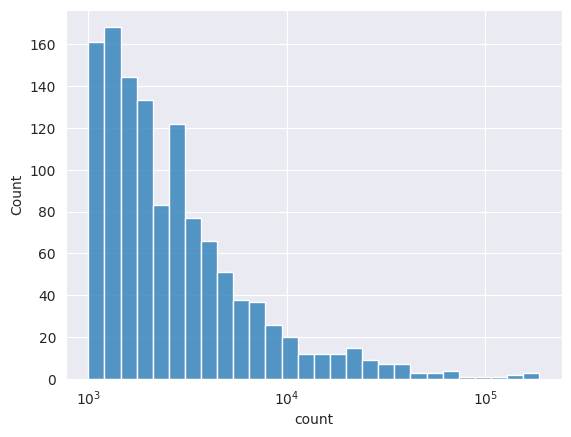

In [18]:
sns.histplot(high_accident_cities,log_scale=True)

## start time

In [19]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


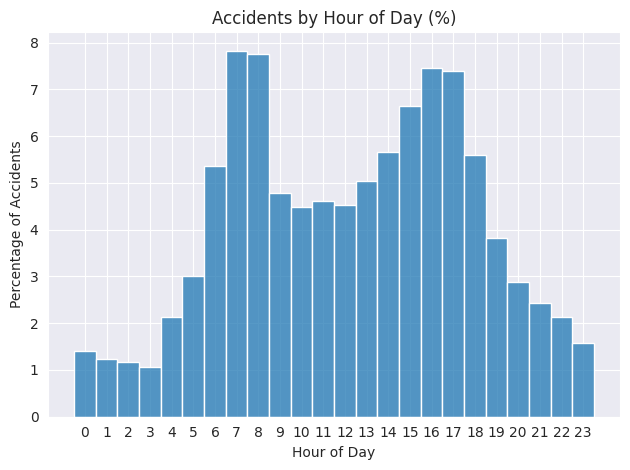

In [20]:
sns.histplot(df['Start_Time'].dt.hour, bins=24, stat='percent', discrete=True)

plt.xlabel("Hour of Day")
plt.ylabel("Percentage of Accidents")
plt.title("Accidents by Hour of Day (%)")
plt.xticks(range(0, 24))  # Ensures each hour shows up
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


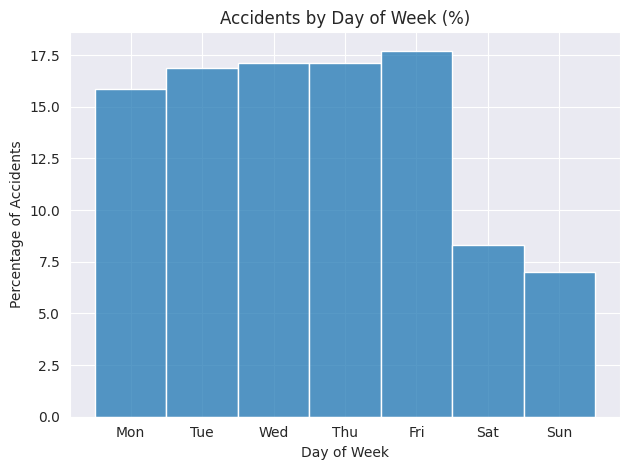

In [21]:
sns.histplot(df['Start_Time'].dt.dayofweek, bins=7, stat='percent', discrete=True)

plt.xlabel("Day of Week")
plt.ylabel("Percentage of Accidents")
plt.title("Accidents by Day of Week (%)")
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


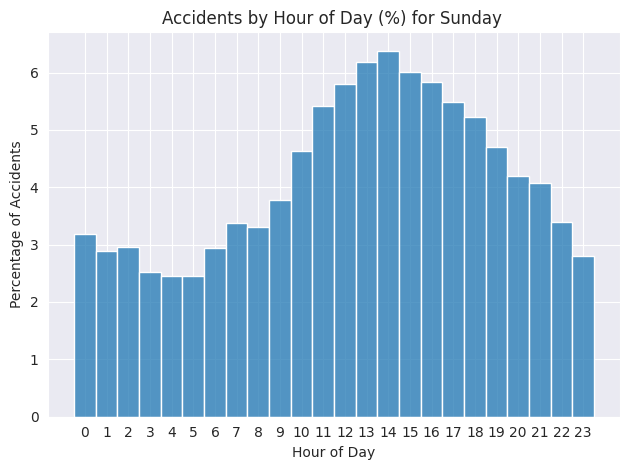

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


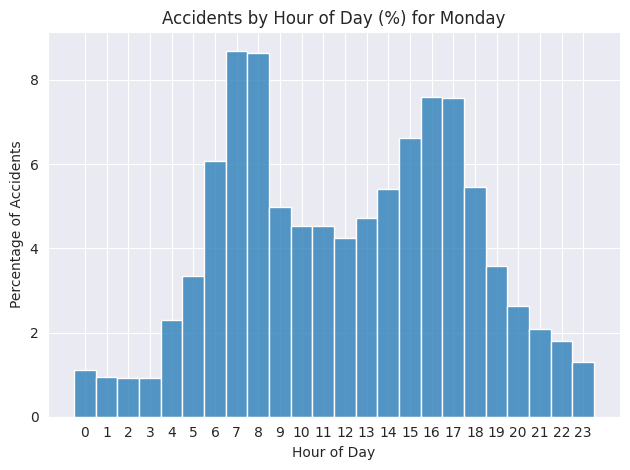

In [22]:
for_sunday=df.Start_Time[df.Start_Time.dt.dayofweek==6 ]

sns.histplot(for_sunday.dt.hour, bins=24, stat='percent', discrete=True)

plt.xlabel("Hour of Day")
plt.ylabel("Percentage of Accidents")
plt.title("Accidents by Hour of Day (%) for Sunday ")
plt.xticks(range(0, 24)) 
plt.tight_layout()
plt.show()

for_monday=df.Start_Time[df.Start_Time.dt.dayofweek==0 ]

sns.histplot(for_monday.dt.hour, bins=24, stat='percent', discrete=True)

plt.xlabel("Hour of Day")
plt.ylabel("Percentage of Accidents")
plt.title("Accidents by Hour of Day (%) for Monday")
plt.xticks(range(0, 24)) 
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


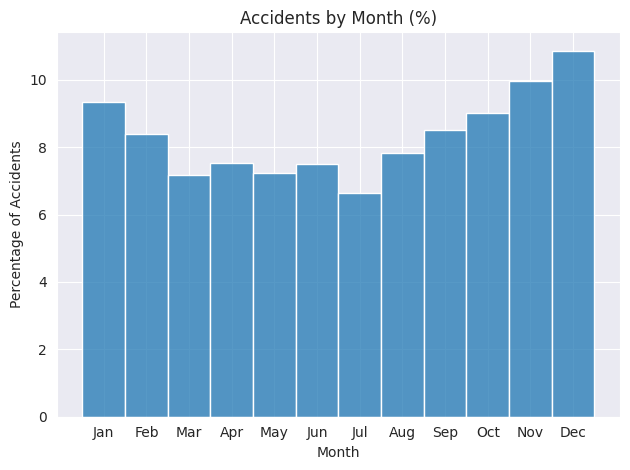

In [23]:
sns.set_style("darkgrid")
sns.histplot(df.Start_Time.dt.month, bins=12, stat='percent', discrete=True)

# Set x-axis labels
plt.xlabel("Month")
plt.ylabel("Percentage of Accidents")
plt.title("Accidents by Month (%)")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


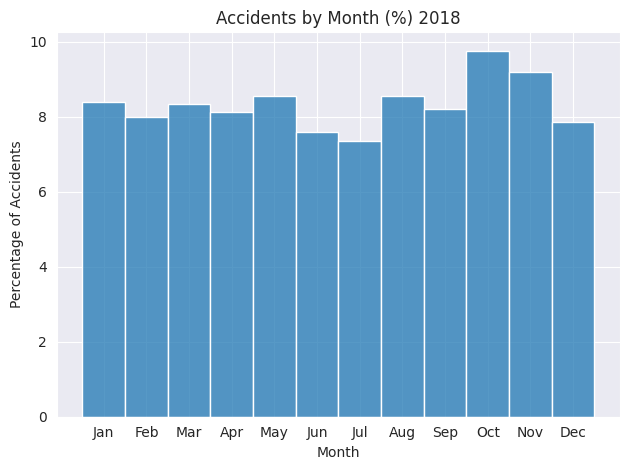

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


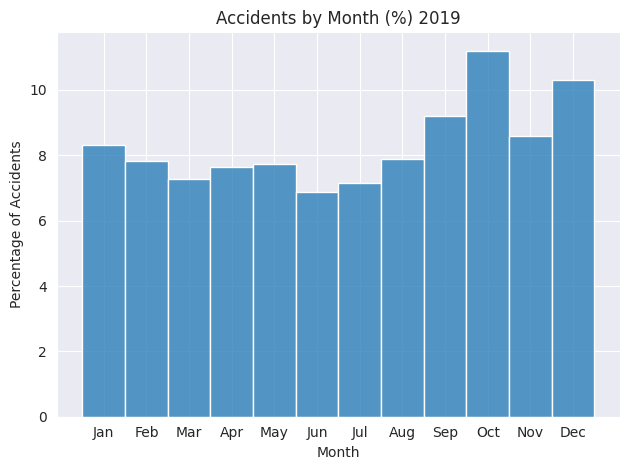

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


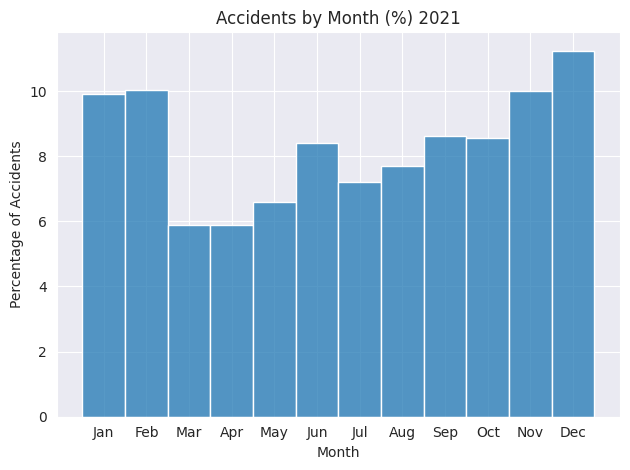

In [24]:
sns.set_style("darkgrid")
sns.histplot(df[df['Start_Time'].dt.year==2018].Start_Time.dt.month, bins=12, stat='percent', discrete=True)

# Set x-axis labels
plt.xlabel("Month")
plt.ylabel("Percentage of Accidents")
plt.title("Accidents by Month (%) 2018")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()

sns.set_style("darkgrid")
sns.histplot(df[df['Start_Time'].dt.year==2019].Start_Time.dt.month, bins=12, stat='percent', discrete=True)

# Set x-axis labels
plt.xlabel("Month")
plt.ylabel("Percentage of Accidents")
plt.title("Accidents by Month (%) 2019")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()

sns.set_style("darkgrid")
sns.histplot(df[df['Start_Time'].dt.year==2021].Start_Time.dt.month, bins=12, stat='percent', discrete=True)

# Set x-axis labels
plt.xlabel("Month")
plt.ylabel("Percentage of Accidents")
plt.title("Accidents by Month (%) 2021")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()

In [25]:
features = ['Bump', 'Crossing', 'Railway', 'Turning_Loop', 'Traffic_Signal',
            'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'No_Exit', 'Give_Way', 'Amenity']


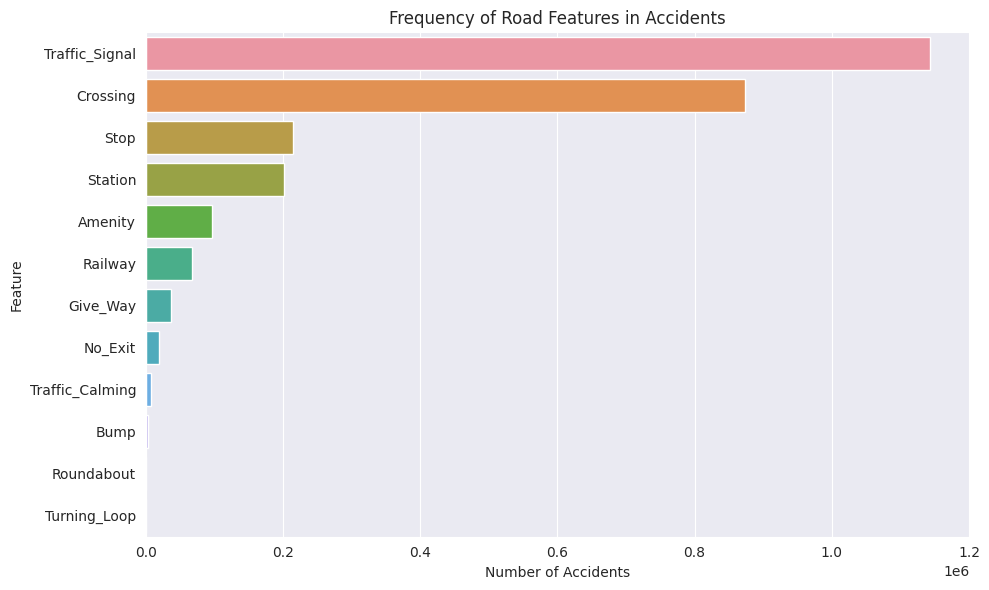

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate count of True for each feature
feature_counts = df[features].sum().sort_values(ascending=False)

# Plot
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_counts.values, y=feature_counts.index)

plt.xlabel("Number of Accidents")
plt.ylabel("Feature")
plt.title("Frequency of Road Features in Accidents")
plt.tight_layout()
plt.show()


<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

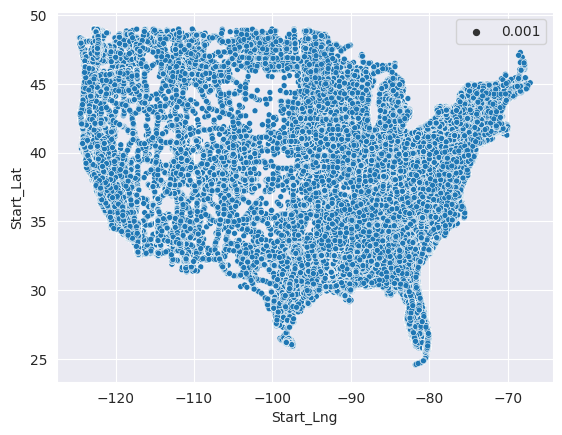

In [27]:
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat,size=0.001)

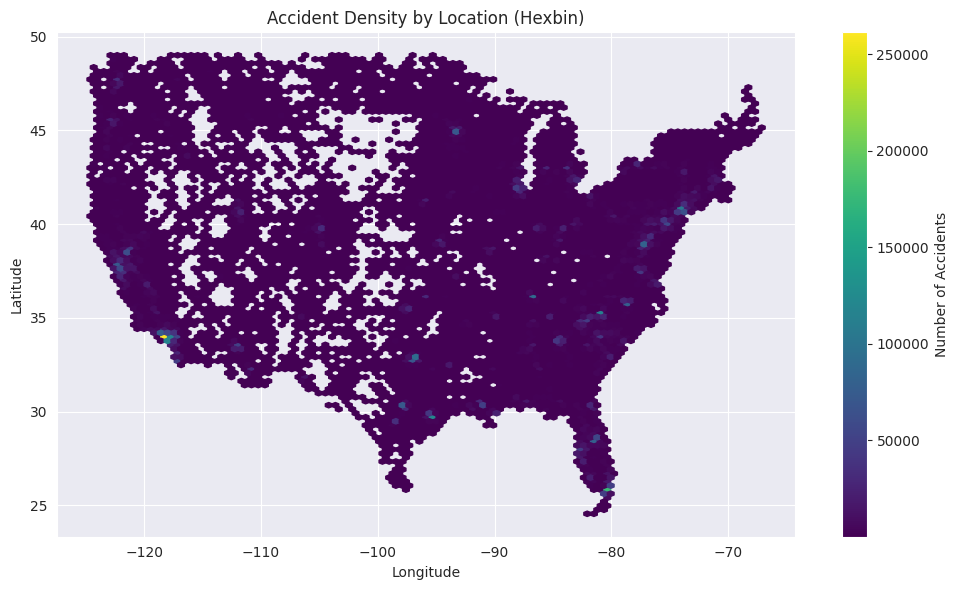

In [28]:

plt.figure(figsize=(10, 6))
plt.hexbin(df['Start_Lng'], df['Start_Lat'], gridsize=100, cmap='viridis', mincnt=1)

plt.colorbar(label='Number of Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accident Density by Location (Hexbin)')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


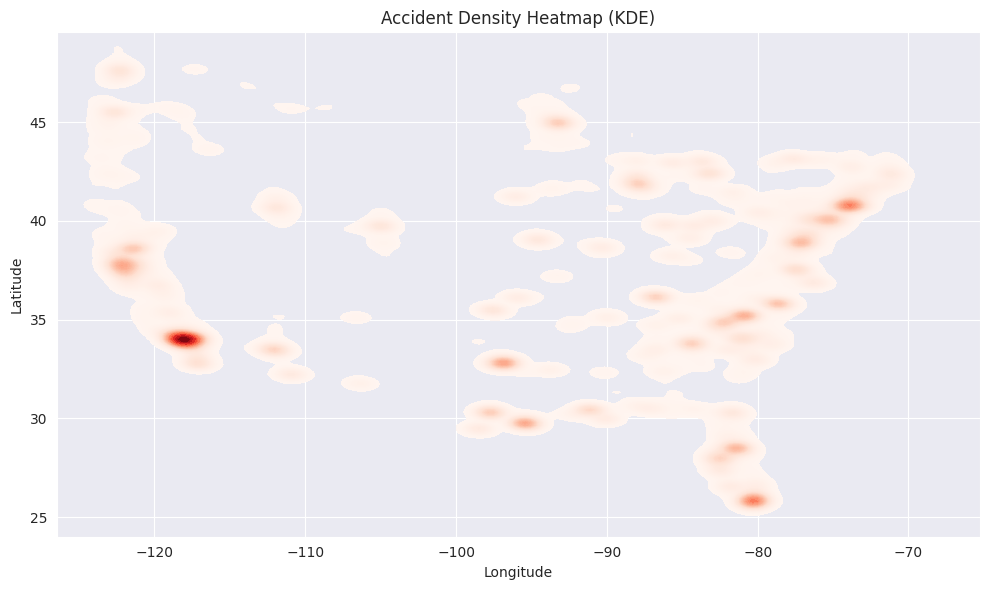

In [29]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df['Start_Lng'], y=df['Start_Lat'], cmap='Reds', fill=True, bw_adjust=0.5, levels=100, thresh=0.05)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accident Density Heatmap (KDE)')
plt.tight_layout()
plt.show()

In [30]:
import folium
from folium.plugins import HeatMap

sample_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(10000)

m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)


HeatMap(data=sample_df.values, radius=8).add_to(m)

# Summary and Conclusion

Insights:
- less than 9% of cities have more than 1000 yearly accidents
- 1023 cities reported 1 accident
- A high percentage of accidents occur between 7am to 9am.
- Next high percentage is at  3pm to 6pm
- On sunday peak occur between 11am to 3 pm , unlike weekdays
- Overall, the number of accidents appears to be higher in November, December, and January. However, when examining the data year by year, the distribution is more consistent across months.